# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import warnings

# Data Importing

In [4]:
data=pd.read_csv('ds_salaries.csv')
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# Data Describe

# Data Preprocessing & Cleaning

In [5]:
df=data.copy()
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [6]:
df['experience_level'].replace(['SE','MI','EN','EX'],["Senior-level / Expert","Mid-level / Intermediate","Entry-level / Junior","Executive-level / Director"],inplace=True)

In [7]:
df['experience_level'].value_counts()

Senior-level / Expert         2516
Mid-level / Intermediate       805
Entry-level / Junior           320
Executive-level / Director     114
Name: experience_level, dtype: int64

In [8]:
df['employment_type'].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [9]:
df['employment_type'].replace(['FT','PT','CT','FL'],["Full-time","Part-time","Contract","Freelance"],inplace=True)

In [10]:
df['employment_type'].value_counts()

Full-time    3718
Part-time      17
Contract       10
Freelance      10
Name: employment_type, dtype: int64

In [11]:
df['company_size'].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

In [12]:
df['company_size'].replace(['M','L','S'],["medium","Large","Small"],inplace=True)

In [13]:
df['company_size'].value_counts()

medium    3153
Large      454
Small      148
Name: company_size, dtype: int64

# Encoding the String Dataset

In [14]:
df.describe(include=object)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,Senior-level / Expert,Full-time,Data Engineer,USD,US,US,medium
freq,2516,3718,1040,3224,3004,3040,3153


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           3755 non-null   int64
 1   experience_level    3755 non-null   int32
 2   employment_type     3755 non-null   int32
 3   job_title           3755 non-null   int32
 4   salary              3755 non-null   int64
 5   salary_currency     3755 non-null   int32
 6   salary_in_usd       3755 non-null   int64
 7   employee_residence  3755 non-null   int32
 8   remote_ratio        3755 non-null   int64
 9   company_location    3755 non-null   int32
 10  company_size        3755 non-null   int32
dtypes: int32(7), int64(4)
memory usage: 220.1 KB


# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=df.drop('salary_in_usd',axis=1).values
y=df['salary_in_usd'].values

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=  0.25, random_state= 42)

# Modeling

# Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf=RandomForestRegressor(max_depth=7 , max_features=3,n_estimators= 100)

In [23]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features=3)

In [24]:
rf.score(x_train, y_train)

0.956861543130973

In [25]:
rf.score(x_test , y_test)

0.8803141262652968

# Model Evaluation

In [26]:
y_pred = rf.predict(x_test)

In [27]:
df3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
df3.head(20)

,Y_test,Y_pred
0,168000,174083.086567
1,179975,181268.621973
2,144000,146451.582482
3,222200,224397.210913
4,230000,163647.939672
5,40000,45559.788537
6,105000,109791.451658
7,100000,92271.863907
8,29751,25090.928066
9,153090,151272.628704


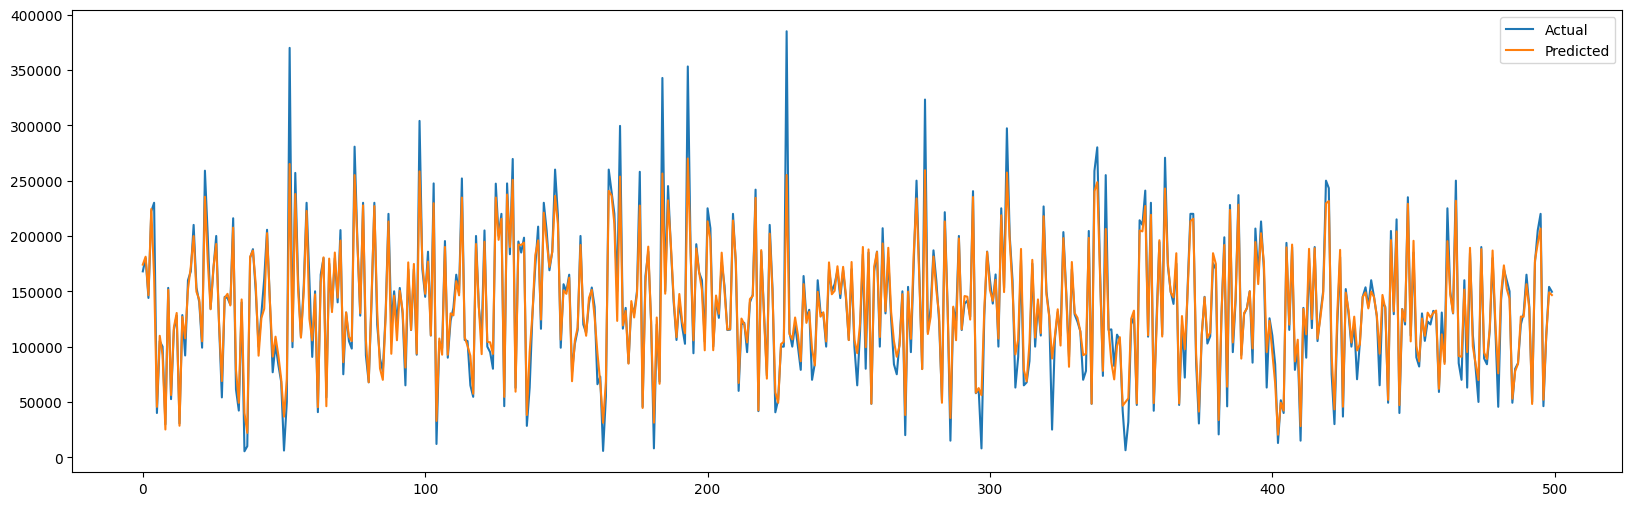

In [28]:
plt.figure(figsize= (20,6))

plt.plot(df3[:500])
plt.legend(["Actual" , "Predicted"])

In [29]:
from sklearn.metrics import r2_score

In [30]:
rf_score=r2_score(y_test , y_pred)
rf_score

0.8803141262652968

# Pickling

In [31]:
import pickle

In [32]:
pickle.dump(rf,open("regmodel.pkl","wb"))